<a href="https://colab.research.google.com/github/Archana-s-s/Archana-s-s/blob/main/classification_algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('/content/heart_missing.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0.0,125,212,0.0,1.0,168,0,1.0,2,2,3,0
1,53,1,0.0,140,203,1.0,0.0,155,1,3.1,0,0,3,0
2,70,1,0.0,145,174,0.0,1.0,125,1,2.6,0,0,3,0
3,61,1,0.0,148,203,0.0,1.0,161,0,0.0,2,1,3,0
4,62,0,0.0,138,294,1.0,1.0,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1.0,140,221,0.0,1.0,164,1,0.0,2,0,2,1
1021,60,1,0.0,125,258,0.0,0.0,141,1,2.8,1,1,3,0
1022,47,1,0.0,110,275,0.0,0.0,118,1,1.0,1,1,2,0
1023,50,0,0.0,110,254,0.0,0.0,159,0,0.0,2,0,2,1


In [6]:
df1=df.groupby('target') ['target'].count()
df1


target
0    499
1    526
Name: target, dtype: int64

In [7]:
df1=df['target'].value_counts()
df1

1    526
0    499
Name: target, dtype: int64

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0.0,125,212,0.0,1.0,168,0,1.0,2,2,3,0
1,53,1,0.0,140,203,1.0,0.0,155,1,3.1,0,0,3,0
2,70,1,0.0,145,174,0.0,1.0,125,1,2.6,0,0,3,0
3,61,1,0.0,148,203,0.0,1.0,161,0,0.0,2,1,3,0
4,62,0,0.0,138,294,1.0,1.0,106,0,1.9,1,3,2,0


In [9]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1020,59,1,1.0,140,221,0.0,1.0,164,1,0.0,2,0,2,1
1021,60,1,0.0,125,258,0.0,0.0,141,1,2.8,1,1,3,0
1022,47,1,0.0,110,275,0.0,0.0,118,1,1.0,1,1,2,0
1023,50,0,0.0,110,254,0.0,0.0,159,0,0.0,2,0,2,1
1024,54,1,0.0,120,188,0.0,1.0,113,0,1.4,1,1,3,0


In [10]:
df.dtypes

age           int64
sex           int64
cp          float64
trestbps      int64
chol          int64
fbs         float64
restecg     float64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [11]:
df.shape

(1025, 14)

In [34]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.939096,131.611707,246.00000,0.151186,0.531832,149.114146,0.336585,1.078402,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.025183,17.516718,51.59251,0.356125,0.526834,23.005724,0.472772,1.170761,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
df.isna().sum()

age          0
sex          0
cp           7
trestbps     0
chol         0
fbs         13
restecg      4
thalach      0
exang        0
oldpeak     11
slope        0
ca           0
thal         0
target       0
dtype: int64

In [14]:
x=df['cp'].mean()
df['cp'].fillna(x,inplace=True)

In [15]:
x=df['fbs'].mean()
df['fbs'].fillna(x,inplace=True)

In [16]:
x=df['oldpeak'].mean()
df['oldpeak'].fillna(x,inplace=True)

In [17]:
x=df['restecg'].mean()
x
df['restecg'].fillna(x,inplace=True)

In [18]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

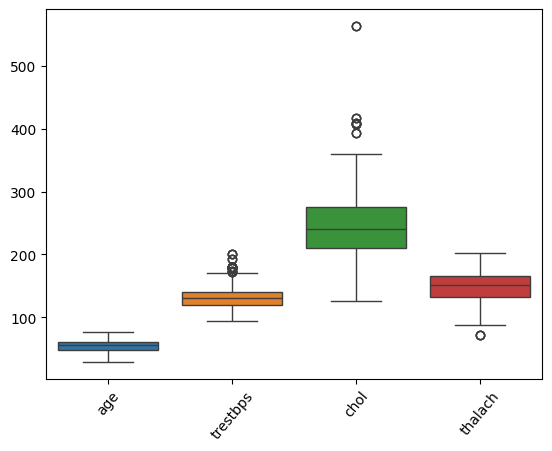

In [19]:
sns.boxplot(data=df[['age','trestbps','chol','thalach']])
plt.xticks(rotation=50)
plt.show()

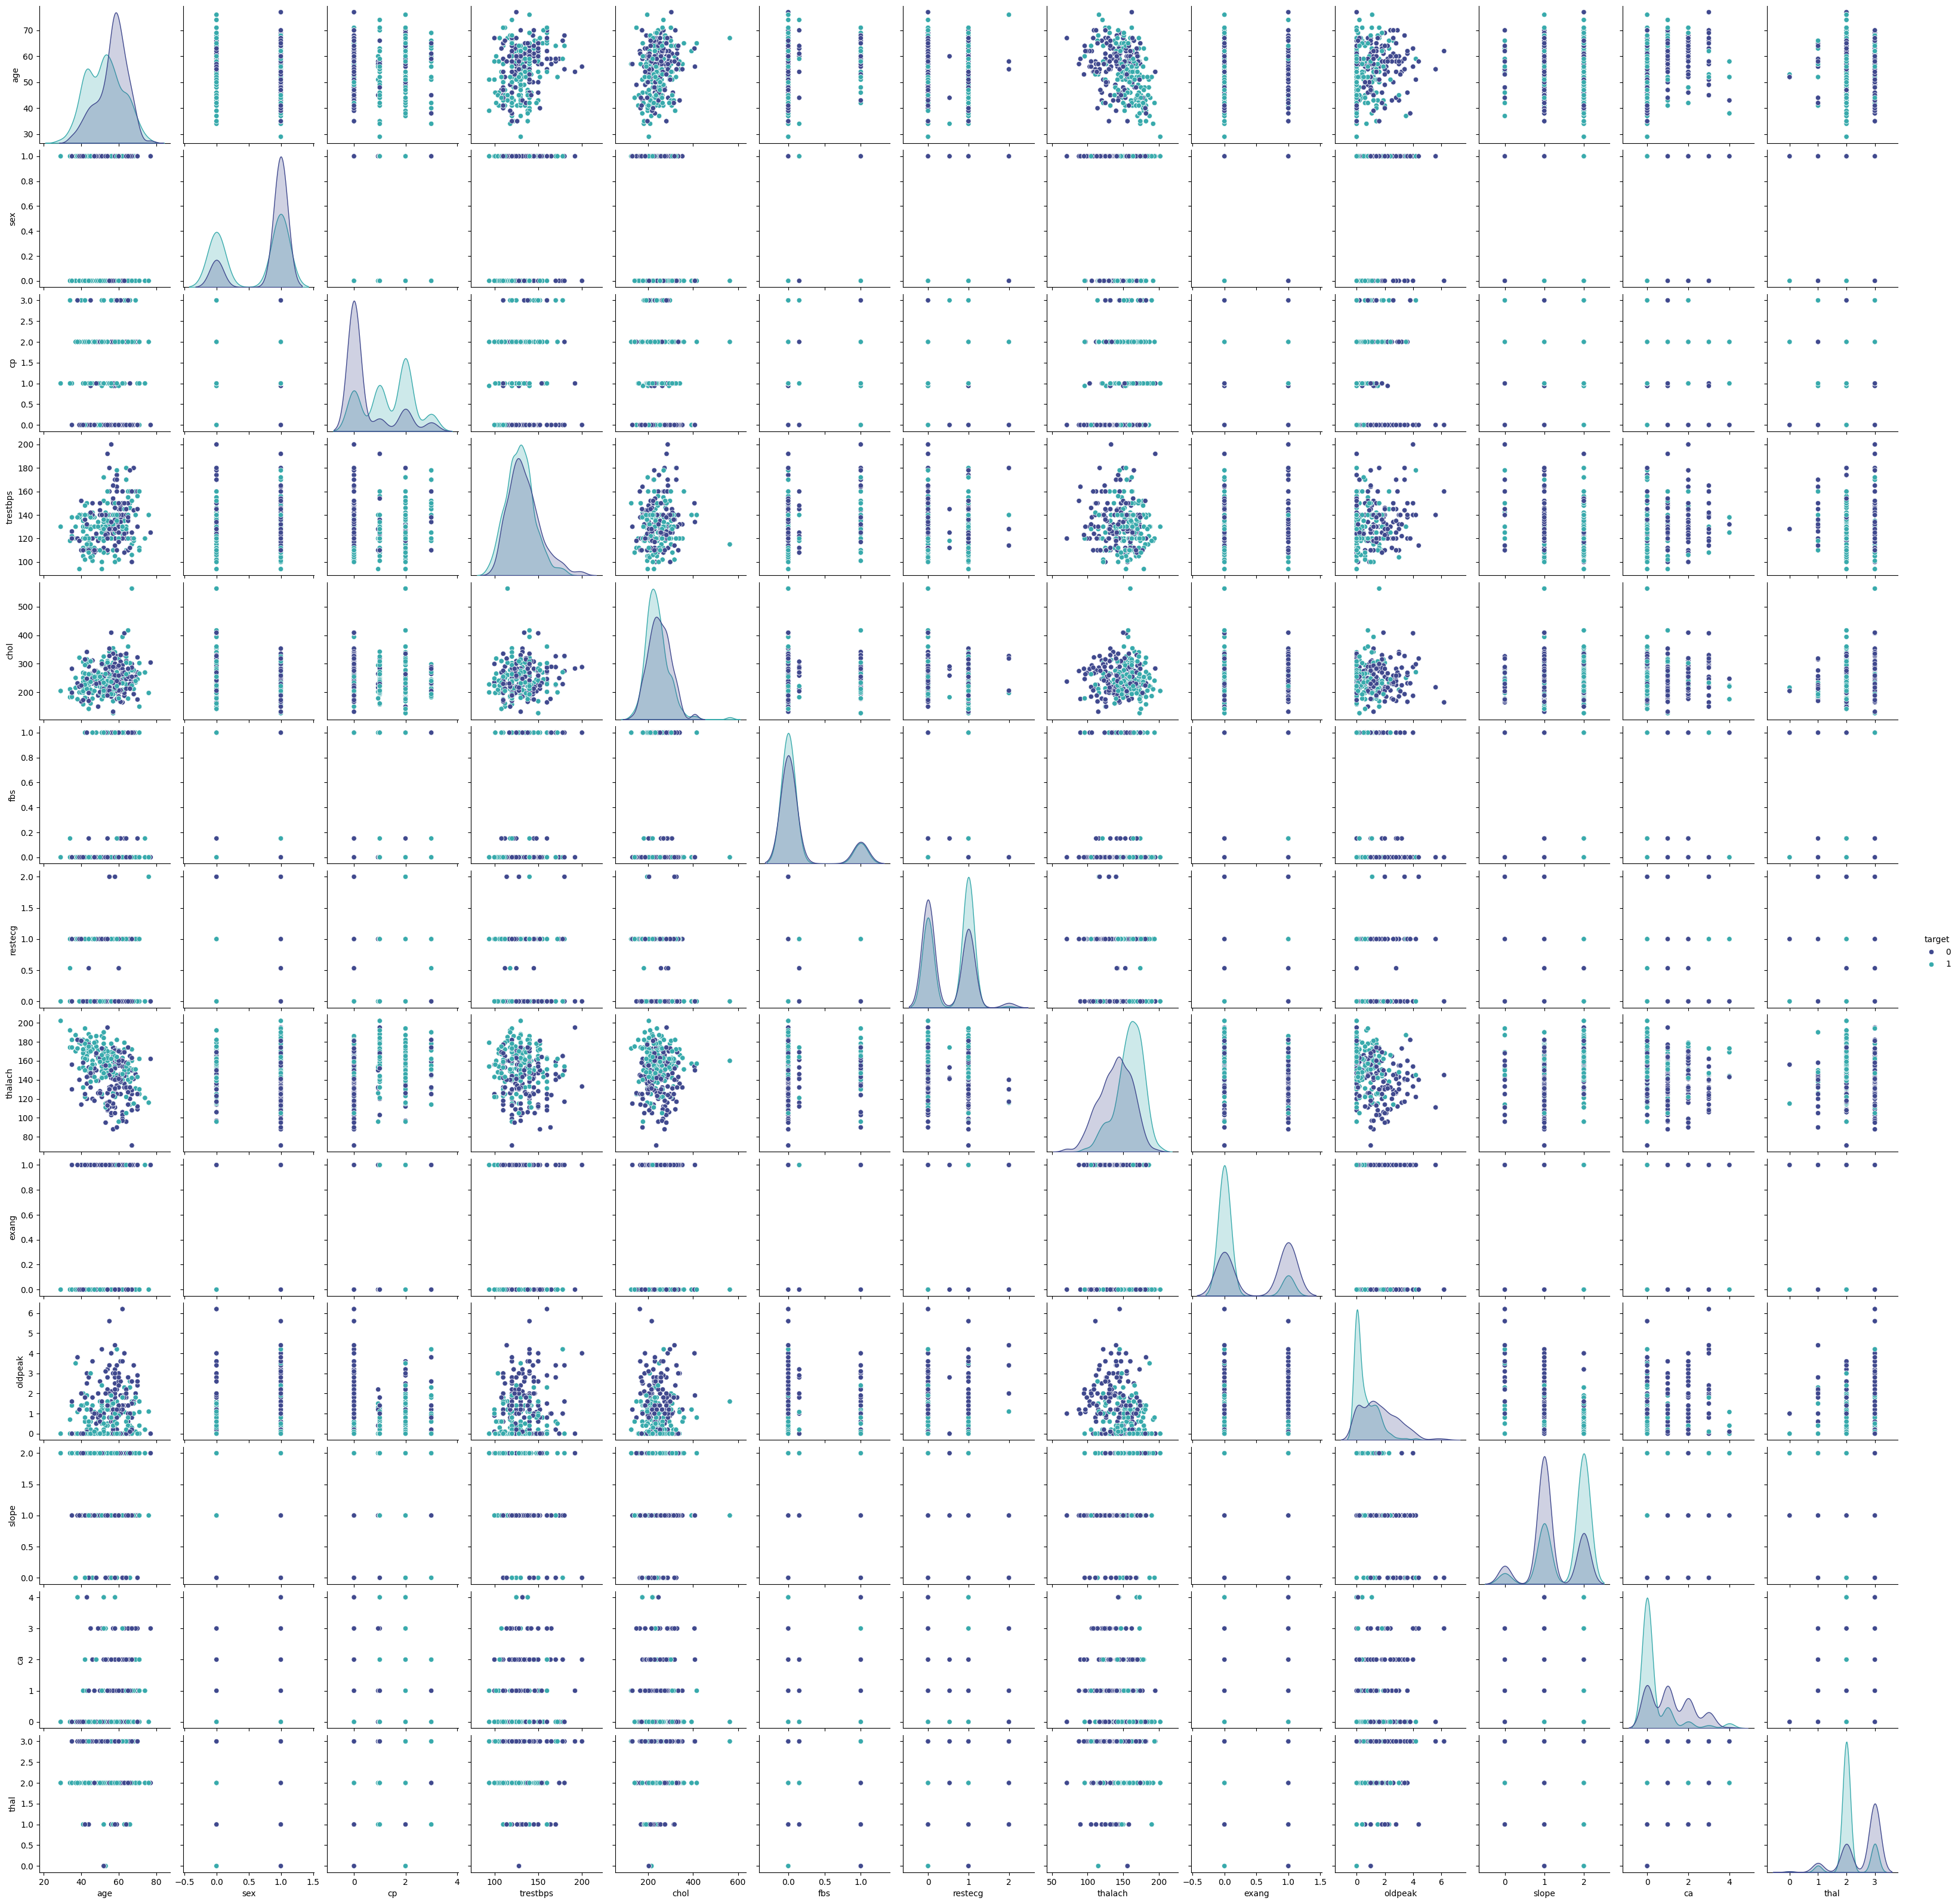

In [20]:
sns.pairplot(df,hue='target',palette='mako' )

<Axes: xlabel='trestbps', ylabel='chol'>

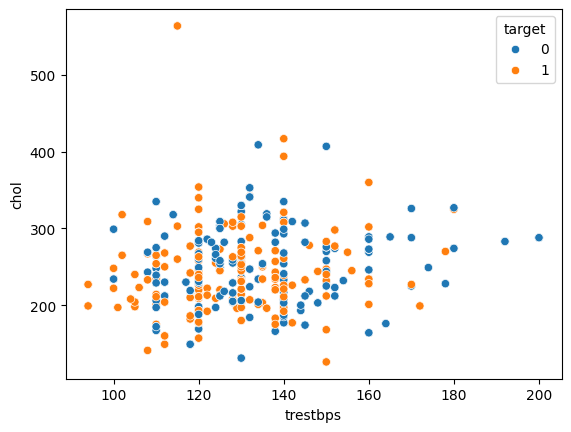

In [21]:
sns.scatterplot(x='trestbps',y='chol',hue='target',data=df)

<Axes: >

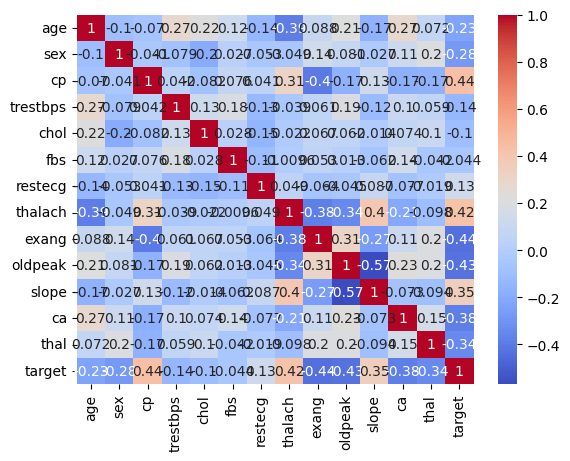

In [22]:
# create a heatmap using Seaborn
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

In [23]:
y=df.iloc[:,-1].values
y

array([0, 0, 0, ..., 0, 1, 0])

In [24]:
x=df.iloc[:,:-1].values
x

array([[52.,  1.,  0., ...,  2.,  2.,  3.],
       [53.,  1.,  0., ...,  0.,  0.,  3.],
       [70.,  1.,  0., ...,  0.,  0.,  3.],
       ...,
       [47.,  1.,  0., ...,  1.,  1.,  2.],
       [50.,  0.,  0., ...,  2.,  0.,  2.],
       [54.,  1.,  0., ...,  1.,  1.,  3.]])

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)

In [26]:
x_train

array([[59.,  1.,  1., ...,  2.,  0.,  2.],
       [58.,  1.,  0., ...,  1.,  3.,  3.],
       [44.,  0.,  2., ...,  1.,  1.,  2.],
       ...,
       [51.,  1.,  0., ...,  2.,  0.,  3.],
       [43.,  1.,  0., ...,  2.,  0.,  3.],
       [52.,  1.,  0., ...,  2.,  1.,  2.]])

In [27]:
x_test

array([[62.,  0.,  0., ...,  2.,  0.,  2.],
       [53.,  0.,  2., ...,  2.,  0.,  0.],
       [55.,  1.,  0., ...,  1.,  1.,  3.],
       ...,
       [70.,  1.,  2., ...,  1.,  1.,  3.],
       [67.,  1.,  0., ...,  1.,  2.,  2.],
       [64.,  1.,  2., ...,  2.,  0.,  2.]])

In [28]:
y_train

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [29]:
y_test

array([1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0,

In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)
x_train=scaler.transform(x_train)
x_test=scaler.transform(x_test)
x_train

array([[ 0.51227152,  0.64358464,  0.03400296, ...,  0.97708096,
        -0.72837545, -0.53812812],
       [ 0.40223597,  0.64358464, -0.92715279, ..., -0.65214474,
         2.10991368,  1.10373511],
       [-1.1382618 , -1.55379719,  0.99515871, ..., -0.65214474,
         0.21772092, -0.53812812],
       ...,
       [-0.36801292,  0.64358464, -0.92715279, ...,  0.97708096,
        -0.72837545,  1.10373511],
       [-1.24829735,  0.64358464, -0.92715279, ...,  0.97708096,
        -0.72837545,  1.10373511],
       [-0.25797736,  0.64358464, -0.92715279, ...,  0.97708096,
         0.21772092, -0.53812812]])

In [31]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
k_model=KNeighborsClassifier(n_neighbors=7)
n_model=GaussianNB()
s_mode=SVC()
lst_model=[k_model,n_model,s_mode]

In [32]:
for i in lst_model:
  print("model name is: ",i)
  i.fit(x_train,y_train)
  y_pred=i.predict(x_test)
  print(confusion_matrix(y_test,y_pred))
  print(accuracy_score(y_test,y_pred))

model name is:  KNeighborsClassifier(n_neighbors=7)


NameError: name 'confusion_matrix' is not defined

In [ ]:
#recall precision and F_1 score for model evaluation
from sklearn.metrics import  classification_report
print(classification_report(y_test,y_pred))

